Populating the interactive namespace from numpy and matplotlib
Cu_orbs =  ['d3z2r2', 'dx2y2', 'dxy', 'dxz', 'dyz']
O1_orbs =  ['px']
O2_orbs =  ['py']
turn on interactions for symmetries =  ['ALL']
compute A(w) for symmetries =  []
E_1S =  50
E_1G =  50
E_1D =  50
E_3P =  50
E_3F =  50


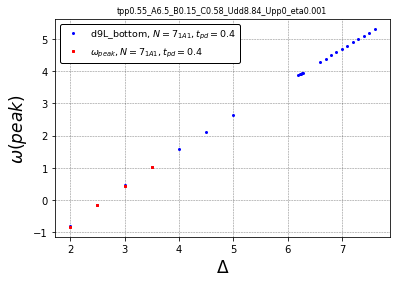

In [1]:
# Supplemental program for 1A1_lowest_peak_dispersion.ipynb
# to compare the Aw and w position for the lowest peak in 1A1 channel
# for 3-, 7-orbital models

%pylab inline

import math
import numpy as np
from scipy.sparse.linalg import inv
#from numpy.linalg import inv
import scipy.sparse as sps
import scipy.sparse.linalg
import sys
import matplotlib.pyplot as plt
sys.path.append('../../src/')
from pylab import *

import parameters as pam
import lattice as lat
import variational_space as vs
import hamiltonian as ham
import basis_change as basis
import lanczos

########################################################################################
# first plot lowest peak and d9L continuum bottom separately to see if any discontinuity
########################################################################################
ed = 0
tpds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
tpds = [0.4]
tpp = 0.55

pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

Npts = 9

A = 6.5
B = 0.15
C = 0.58
Udd = A+4*B+3*C
Upp = 0
eta = 0.001

Norb7 = 7
Mc7 = 32

titlename = 'tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Udd'+str(Udd)+'_Upp'+str(Upp)+'_eta'+str(eta)
    
##########################################################################
# E of lowest peak
##########################################################################
Ms = ['bo','rs','g^','m<','cp','k>','yv','--b','--r','--g','--m','--c','--k','--y']
# a[1,0]-tpp*4 is the bottom of p-band
# when (a[:,0]-tpp*4)-a[:,2] less than 0, peak within continuum; larger than 0, discrete state
ii = 0
for tpd in tpds:
    f1A1 = 'Norb7_tpd'+str(tpd)+'_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp) \
           +'_Mc'+str(Mc7)+'_eta'+str(eta)+'_1A1.txt'
    a = loadtxt('./data_lowpeak/'+f1A1,skiprows=0)
    
    # continuum bottom via one-hole calculation with exact min(E(k)):
    #b = loadtxt('../onehole_impurity_model/data_E_imp/E_imp_Norb7_tpd'+str(tpd)+'_tpp0.55_Mc32_1A1.txt',skiprows=0)
    #ab = a[:,0]-4.*tpp+b[:,2]
    # continuum bottom via two-hole calculation with A=50, B=C=0:
    b = loadtxt('./data_lowpeak/Aw_Cu_dx2y2_O_Norb7_tpd'+str(tpd) \
                +'_tpp0.55_A50_B0_C0_Upp0_Mc32_eta0.001.txt',skiprows=0)
    
    # debug: 
    print 'Delta,  wpeak,  d9L,  dw'
    for i in range(0,len(b)):
        print a[i,0], a[i,2], ab[i], ab[i]-a[i,2]
        
    plot(b[:,0], b[:,2], Ms[ii], Markersize=2, label="d9L_bottom, $N=7_{1A1}, t_{pd}=$"+str(tpd))
    plot(a[:,0], a[:,2], Ms[ii+1], Markersize=2, label="$\omega_{peak}, N=7_{1A1}, t_{pd}=$"+str(tpd))
    ii += 1

title(titlename, fontsize=8)
xlabel('$t_{pd}$',fontsize=17)
xlabel('$\Delta$',fontsize=17)
ylabel('$\omega(peak)$',fontsize=17)
#xlim([-4,-3])
#ylim([-13,-9])
#text(0.45, 0.1, '(a)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("wpeak_d9L_bottom_"+titlename+"_1A1.pdf")

tpd =  0.1
[9.33 9.34 9.36 9.38 9.4  9.42 9.44 9.46 9.48 9.5  9.52 9.54 9.56 9.58
 9.6  9.62 9.64 9.66 9.68 9.7  9.72 9.74 9.76 9.78 9.8  9.82 9.84 9.86
 9.88 9.9  9.92 9.94 9.96 9.98]
[9.33 9.34 9.36 9.38 9.4  9.42 9.44 9.46 9.48 9.5  9.52 9.54 9.56 9.58
 9.6  9.62 9.64 9.66 9.68 9.7  9.72 9.74 9.76 9.78 9.8  9.82 9.84 9.86
 9.88 9.9  9.92 9.94 9.96 9.98]
9.33
min positive d9L-wpeak =  0.006857218999999581 at Delta =  [9.34]
tpd =  0.2
[ 9.    9.02  9.04  9.06  9.08  9.1   9.2   9.3   9.4   9.5   9.6   9.7
  9.8   9.9  10.    8.9   8.91  8.92  8.93  8.94  8.95  8.96  8.97  8.98
  8.99]
[ 9.    9.02  9.04  9.06  9.08  9.1   9.2   9.3   9.4   9.5   9.6   9.7
  9.8   9.9  10.    8.9   8.91  8.92  8.93  8.94  8.95  8.96  8.97  8.98
  8.99]
8.9
min positive d9L-wpeak =  0.009862829999999434 at Delta =  [9.]
tpd =  0.3
[ 8.12  8.17  8.22  8.27  8.32  8.37  8.42  8.47  8.52  8.57  8.7   8.75
  8.8   8.85  8.9   8.95  9.    9.1   9.2   9.3   9.4   9.5   9.6   9.7
  9.8   9.9  10.    8.11  8.1

ValueError: operands could not be broadcast together with shapes (4,) (112,) 

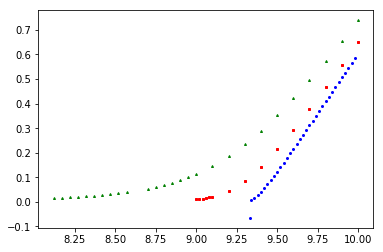

In [2]:
ed = 0
tpds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
#tpds = [0.3]
tpp = 0.55

pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

Npts = 9

A = 6.5
B = 0.15
C = 0.58
Udd = A+4*B+3*C
Upp = 0
eta = 0.001

Norb7 = 7
Mc7 = 32

titlename = 'tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp)+'_eta'+str(eta)
    
##########################################################################
# bottom of d9L continuum - E_lowpeak for 1A1
# a[:,0]-4.*tpp+b[:,2] is the bottom of continuum
##########################################################################
Ms = ['bo','rs','g^','m<','cp','k>','yv','--b','--r','--g','--m','--c','--k','--y']
# a[1,0]-tpp*4 is the bottom of p-band
# when (a[:,0]-tpp*4)-a[:,2] less than 0, peak within continuum; larger than 0, discrete state
ii = 0
for tpd in tpds:
    print 'tpd = ', tpd
    
    f1A1 = 'Norb7_tpd'+str(tpd)+'_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp) \
           +'_Mc'+str(Mc7)+'_eta'+str(eta)+'_1A1.txt'
    a = loadtxt('./data_lowpeak/'+f1A1,skiprows=0)
    b = loadtxt('../onehole_impurity_model/data_E_imp/E_imp_Norb7_tpd'+str(tpd)+'_tpp0.55_Mc32_1A1.txt',skiprows=0)
    print a[:,0]
    print b[:,0]
    ab = (a[:,0]-4.*tpp+b[:,2])-a[:,2]
    
    idx = find(ab>-0.5)
    plot(a[idx,0], ab[idx], Ms[ii], Markersize=2, label="$t_{pd}=$"+str(tpd))
    #plot(a[:,0], ab, Ms[ii], Markersize=2, label="$t_{pd}=$"+str(tpd))
    ii += 1
    print min(a[:,0])
    
    # find critical Delta
    #'''
    idx = find(ab>0.)
    ab_min = min(ab[idx])
    id_min = find(ab==ab_min)
    print 'min positive d9L-wpeak = ', ab_min, 'at Delta = ', a[id_min,0]
    idx = find(ab<0.)
    #ab_max = max(ab[idx])
    #id_max = find(ab==ab_max)
    #print 'max negative d9L-wpeak = ', ab_max, 'at Delta = ', a[id_max,0]

title(titlename+'_1A1_N=7', fontsize=8)
xlabel('$t_{pd}$',fontsize=17)
xlabel('$\Delta$',fontsize=17)
ylabel('d9L- $\omega_p$',fontsize=17)
#xlim([0,1])
#text(0.45, 0.1, '(a)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("dw_lowpeak_"+titlename+"_1A1.pdf")

In [ ]:
ed = 0
tpds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
tpp = 0.55

pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

Npts = 9

A = 6.5
B = 0.15
C = 0.58
Udd = A+4*B+3*C
Upp = 0
eta = 0.001

Norb7 = 7
Mc7 = 32

titlename = 'tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp)+'_eta'+str(eta)
    
##########################################################################
# bottom of d9L continuum - E_lowpeak for 3B1
# a[:,0]-4.*tpp+b[:,2] is the bottom of continuum
##########################################################################
Ms = ['bo','rs','g^','m<','cp','k>','yv','--b','--r','--g','--m','--c','--k','--y']
# a[1,0]-tpp*4 is the bottom of p-band
# when (a[:,0]-tpp*4)-a[:,2] less than 0, peak within continuum; larger than 0, discrete state
ii = 0
for tpd in tpds:
    print 'tpd = ', tpd
    f3B1 = 'Norb7_tpd'+str(tpd)+'_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp) \
           +'_Mc'+str(Mc7)+'_eta'+str(eta)+'_3B1.txt'
    a = loadtxt('./data_lowpeak/'+f3B1,skiprows=0)
    b = loadtxt('../onehole_impurity_model/data_E_imp/E_imp_Norb7_tpd'+str(tpd)+'_tpp0.55_Mc32_3B1.txt',skiprows=0)
    ab = (a[:,0]-4.*tpp+b[:,2])-a[:,2]
    idx = find(ab>-0.2)
    plot(a[idx,0], ab[idx], Ms[ii], Markersize=2, label="$t_{pd}=$"+str(tpd))
    ii += 1
    
    # find critical Delta
    #'''
    idx = find(ab>0.)
    ab_min = min(ab[idx])
    id_min = find(ab==ab_min)
    print 'min positive d9L-wpeak = ', ab_min, 'at Delta = ', a[id_min,0]
    idx = find(ab<0.)
    ab_max = max(ab[idx])
    id_max = find(ab==ab_max)
    print 'max negative d9L-wpeak = ', ab_max, 'at Delta = ', a[id_max,0]
    #'''

title(titlename+'_1A1_N=7', fontsize=8)
xlabel('$\Delta$',fontsize=17)
ylabel('d9L- $\omega_p$',fontsize=17)
#xlim([4,10])
#text(0.45, 0.1, '(a)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("dw_lowpeak_"+titlename+"_3B1.pdf")

In [ ]:
##########################################################################
# weight of lowest peak
##########################################################################
#clf()
ii = 0
for tpd in tpds:
    f1A1 = 'Norb7_tpd'+str(tpd)+'_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp) \
           +'_Mc'+str(Mc7)+'_eta'+str(eta)+'_1A1.txt'
    f3B1 = 'Norb7_tpd'+str(tpd)+'_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp) \
           +'_Mc'+str(Mc7)+'_eta'+str(eta)+'_3B1.txt'
    #a = loadtxt('./data_lowpeak/'+f1A1,skiprows=0)
    #plot(a[:,0], a[:,3], Ms[ii], label="$N=7_{1A1}, t_{pd}=$"+str(tpd))
    a = loadtxt('./data_lowpeak/'+f3B1,skiprows=0)
    plot(a[:,0], a[:,3], Ms[ii], Markersize=2, label="$N=7_{3B1}, t_{pd}=$"+str(tpd))
    ii += 1

title(titlename, fontsize=8)
xlabel('$t_{pd}$',fontsize=17)
xlabel('$\Delta$',fontsize=17)
ylabel('low peak weight',fontsize=17)
xlim([4,10])
#ylim([0,0.04])
#text(0.45, 0.1, '(a)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("weight_lowpeak_"+titlename+"_3B1.pdf")

In [ ]:
a = loadtxt('./data_lowpeak/Aw_Cu_dx2y2_O_Norb7_tpp0.55_A50_B0_C0_Upp0_Mc32_eta0.001.txt',skiprows=0)
b = loadtxt('./data_lowpeak/Norb7_tpd0.4_tpp0.55_A6.5_B0.15_C0.58_Upp0_Mc32_eta0.001_1A1.txt',skiprows=0)
plot(b[:,0], a[0:4,2]-b[:,2], '-bo', Markersize=2, label="$N=7_{3B1}, t_{pd}=$"+str(tpd))